# Data Finding : Ford GoBike System Data
## by Yasser Mohammed Alosaimi

## Table of Contents:
      Introduction
      Preliminary Wrangling
      Data Assessment
      Data Wrangling
      clean the data
      Univariate Exploration
      Bivariate Exploration
      Multivariate Exploration

# Preliminary Wrangling

This data set had information about individual rides made in a bike-sharing system 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('fordgobike-Tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Data Assessment

Then this dataset will be assessed to check if there are any problems in it.

In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [7]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Data Wrangling

Type change for ease of handling

In [10]:
df.user_type = df.user_type.astype('category')

In [11]:
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [12]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

Add columns to form relationships

In [13]:
df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

# clean the data

Drop some columns we don't need 

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [16]:
df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Feb,Thu,17
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Feb,Thu,18
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23


In [17]:
df.tail()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour
183407,480,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Feb,Fri,00
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Feb,Fri,00
183409,141,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Feb,Fri,00
183410,139,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Feb,Fri,00
183411,271,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No,Feb,Fri,00


In [18]:
df.shape

(183412, 17)

In [19]:
df.dtypes

duration_sec                  int64
start_station_id             object
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id               object
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                      object
user_type                  category
member_birth_year           float64
member_gender                object
bike_share_for_all_trip      object
month                        object
day                          object
hour                         object
dtype: object

In [20]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_station_id         183412 non-null  object  
 2   start_station_name       183215 non-null  object  
 3   start_station_latitude   183412 non-null  float64 
 4   start_station_longitude  183412 non-null  float64 
 5   end_station_id           183412 non-null  object  
 6   end_station_name         183215 non-null  object  
 7   end_station_latitude     183412 non-null  float64 
 8   end_station_longitude    183412 non-null  float64 
 9   bike_id                  183412 non-null  object  
 10  user_type                183412 non-null  category
 11  member_birth_year        175147 non-null  float64 
 12  member_gender            175147 non-null  object  
 13  bike_share_for_all_trip  183412 non-null  ob

### What is the structure of your dataset?

After cleaning, there are 183412 rows and 17 features in this dataset. Some of them are numeric values, and some of them are categorical values. There are some special values like timestamp to show the start and end time, and the longtitude and latitude value to show the geopraphic location.

### What is/are the main feature(s) of interest in your dataset?

One of the important features is the duration of the trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the trip duration is related to certain days of the week and certain months. Also, other features like the distance from the start and end location,  Start Date and End time.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Exploring how much time spent on the bike in SEC?

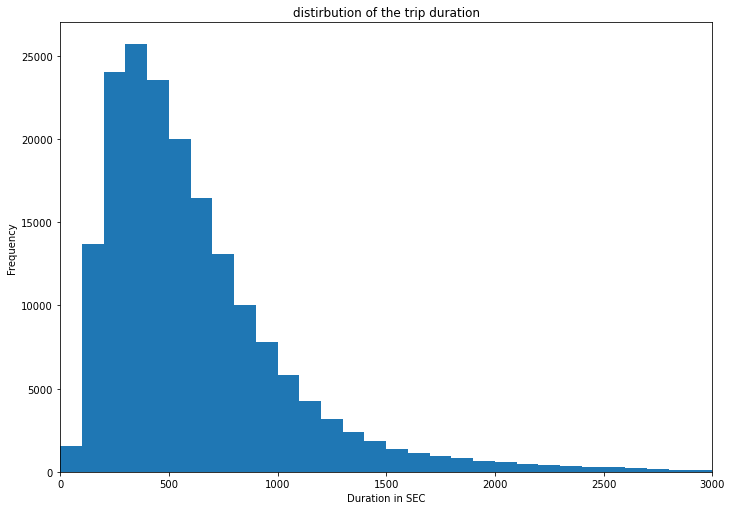

In [22]:
binss = np.arange(0, df['duration_sec'].max()+100, 100);
plt.figure(figsize = [ 11.69, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = binss)
plt.xlim(0,3000)

plt.title("distirbution of the trip duration")
plt.xlabel("Duration in SEC")
plt.ylabel("Frequency")
plt.show();

due to the above plot is right-screwed, with a long tail on the right. So, i will change the duration in minutes and see if it possible to explore it more.

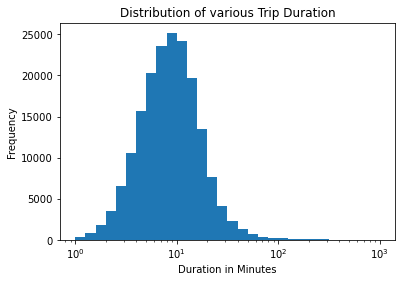

In [23]:
# Converting the trip durations from seconds to minutes 

df['duration_min'] = df['duration_sec'] / 60


binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

Most cyclists enjoy short trips of about 10 minutes.

### What is the highest classification of user type?

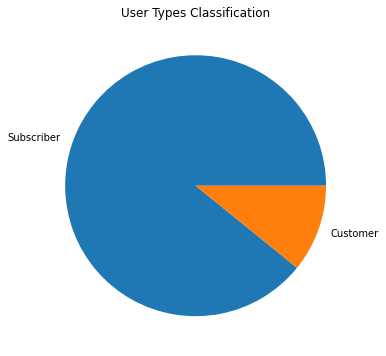

In [24]:
user_types = df['user_type'].value_counts()
plt.figure(figsize=[8,6])
plt.pie(user_types , labels = user_types.index );

plt.title('User Types Classification');
plt.show();

As we can see the pie plot shows that the Subscriber ( Member) user type is most popular than Customer (Casual)

### Are the weekdays have way more trips than the weekends?

Text(0.5, 0, 'day of the trip')

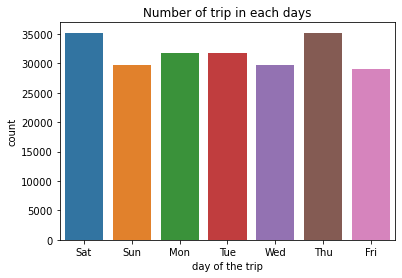

In [25]:
# lebale the days to be in order
week_days = [ 'Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

sb.countplot(data=df, x='day');
plt.title('Number of trip in each days');
sb.countplot(data=df, x='day', order = week_days );
plt.xlabel('day of the trip')

From the figure we notice that the weekdays have more trips than weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The flight duration was skewed to the right and had many ponts; A shift in range was required. Most of the points were between 1 and 20 minutes
* The days of the week had more trip than weekends. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The data was tidy , but I add three needed columns which are : Day , Month , and hour.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### what is the Relationship between duration and diffrent user type?

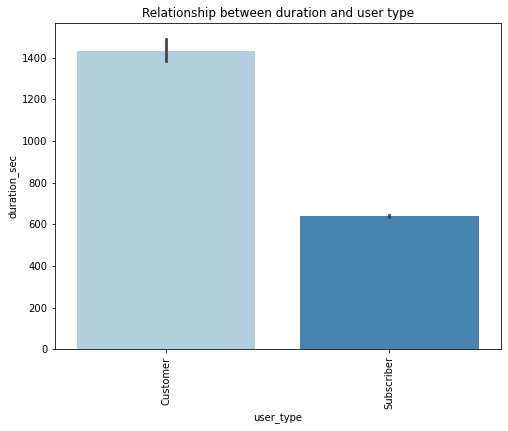

In [26]:
plt.figure(figsize = [8,6])
sb.barplot(data = df, x = 'user_type', y = 'duration_sec', palette = 'Blues')
plt.xticks(rotation=90)

plt.title('Relationship between duration and user type');
plt.show()


we see the Customer type has longest duration 

### Can you investigate the relation between the daywise usage of bike in Second?

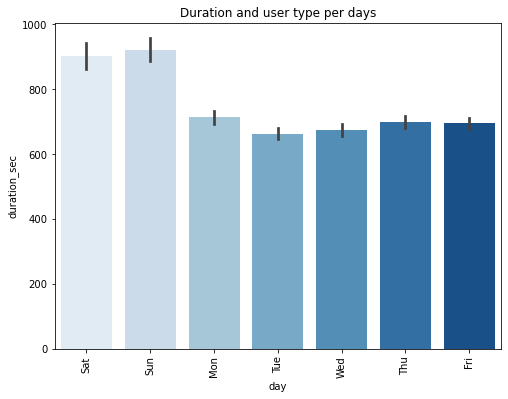

In [30]:
# lebale the days to be in order
week_days = [ 'Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

plt.figure(figsize = [8, 6])
sb.barplot(data = df , x = 'day', y = 'duration_sec', order = week_days, palette = 'Blues')
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.

### Looking at the gender

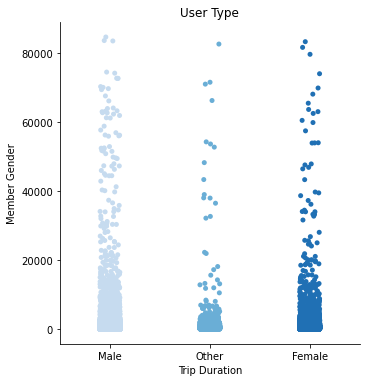

In [28]:
sb.catplot(x="member_gender", y="duration_sec", data=df, palette = 'Blues')
plt.title('User Type');
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

We note that the male makes a little more trips than the female

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The customer has a longer trip
* On Saturdays and Sundays, the bike is used for more than 800 seconds
* The male makes more trips than the female

###  Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* There is a strong relationship between Saturday and Sunday with the duration of bicycle use

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What is the relationship between user type and gender?

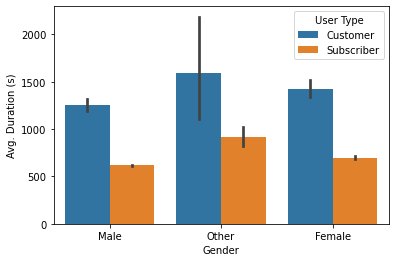

In [52]:
# plot the relationship between user type and gender
sb.barplot(data=df, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type');

The customer has a larger average duration than the subscriber. The female customer's duration is the largest one. 

### What is the Distribution of trip duartion across user type in different days?

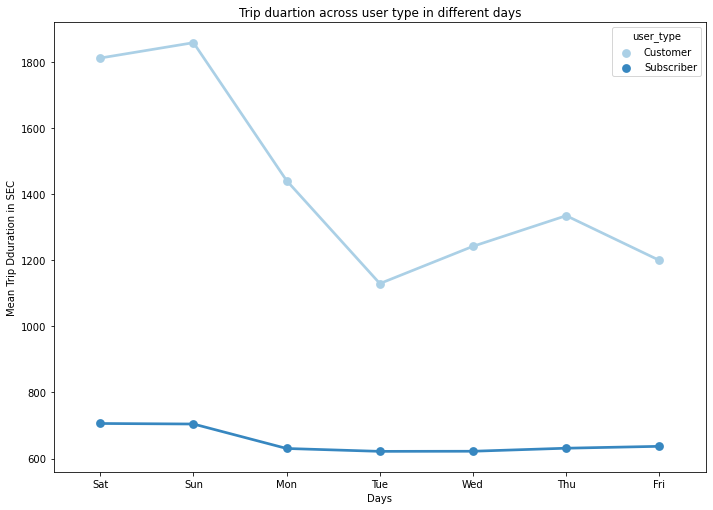

In [54]:
#plt.figure(figsize=[ 11.69, 8.27])
fig = plt.figure(figsize = [ 11.69, 8.27])
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None, order = week_days)

plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration in SEC')
plt.xlabel('Days')
plt.show();

As we investigated last time, both the customer and the subscriber make more trips on Saturday and Sunday, and the customer spends longer than the subscriber

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Saturday and Sunday trips are more than the rest of the week and the customer has a longer period
### Were there any interesting or surprising interactions between features?

* The average duration of customer decreases rapidly.
* The average duration of the other increases rapidly and keep stable.